In [1]:
#Importing dependencies 
import pandas as pd
import os 
import pprint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing csv from Resources 
path = 'Resources/VISTA_cleaned.csv'
Vista = pd.read_csv(path)

city_line_path = 'Resources/Station_line _map.csv'
City_line = pd.read_csv(city_line_path)

housing_path = 'Housing.ipynb'
Housing = pd.read_csv(city_line_path)

/var/folders/zh/1g9r_87s0_b2prpx9v3501kr0000gn/T/ipykernel_89396/2529802361.py:3: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  Vista = pd.read_csv(path)


In [3]:
#Retreiving merged_df from Housing file
%store -r merged_df

In [4]:
merged_df.head()

,City council,Distance,TotalAnnual,TotalAMPeak,TotalPMPeak,TotalWeekday,TotalWeekend,TotalOffpeak,TotalIncrease(%),WeekdayIncrease(%),...,PMIncrease(%),OffPeakIncrease(%),WeekendIncrease(%),House Number of Sales,Unit/Apartment Number of Sales,Vacant House Number of Sales,Total Number of Sales,With train,City Council_format2,City Council_only with train
0,Banyule C,13.392110,16823150.0,26600.0,13450.0,59200.0,49850.0,20300.0,57.926785,55.696203,...,77.142857,55.905512,80.970149,5178,3739,82,8999.0,Yes,Banyule City,Banyule C
1,Bayside C,14.183177,19655550.0,28450.0,13250.0,63400.0,70800.0,21850.0,66.655851,63.020833,...,64.285714,62.992126,79.283887,4944,3544,42,8530.0,Yes,Bayside City,Bayside C
2,Boroondara C,9.023778,26341800.0,31350.0,33400.0,94000.0,74000.0,32300.0,66.560298,64.860427,...,64.788732,74.331551,80.906921,6886,5905,85,12876.0,Yes,Boroondara City,Boroondara C
3,Brimbank C,16.208247,19624650.0,29200.0,10750.0,66650.0,60750.0,26700.0,50.600815,49.802372,...,51.282051,48.979592,54.838710,7337,2317,478,10132.0,Yes,Brimbank City,Brimbank C
4,Cardinia S,48.815247,5640200.0,9100.0,3100.0,20550.0,14150.0,8950.0,149.974356,138.541667,...,138.461538,120.930233,196.296296,7831,925,3682,12438.0,Yes,Cardina Shire,Cardinia S


In [5]:
#Trimming spaces on City council values
for i in range(len(merged_df)):
    merged_df = merged_df.replace({merged_df.iloc[i]['City council']:merged_df.iloc[i]['City council'].strip()})

In [6]:
City_line

,Zone,Line name,Station,City council
0,2,Sunbury line,Sunbury,Hume C
1,2,Sunbury line,Diggers Rest,Hume C
2,2,Sunbury line,Watergardens,Brimbank C
3,2,Sunbury line,Keilor Plains,Brimbank C
4,2,Sunbury line,St Albans,Brimbank C
...,...,...,...,...
359,1,Williamstown line,Flagstaff,Melbourne C
360,1,Williamstown line,Melbourne Central,Melbourne C
361,1,Williamstown line,Parliament,Melbourne C
362,1,Williamstown line,Southern Cross,Melbourne C


In [7]:
Vista

,Trip_ID,Person_ID,Year,Total_Stops,Trip_Count,Start_Time,Arrival_Time,Trip_Time,Travel_Time,Wait_Time,...,Mode_5,Mode_6,Mode_7,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7
0,Y12H0000101P01T01,Y12H0000101P01,2012,1,1,525,545,20,20,0,...,0,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0
1,Y12H0000101P01T02,Y12H0000101P01,2012,1,2,1050,1075,25,25,0,...,0,0,0,25,0.0,0.0,0.0,0.0,0.0,0.0
2,Y12H0000101P02T01,Y12H0000101P02,2012,1,1,500,520,20,20,0,...,0,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0
3,Y12H0000101P02T02,Y12H0000101P02,2012,1,2,540,550,10,10,0,...,0,0,0,10,0.0,0.0,0.0,0.0,0.0,0.0
4,Y12H0000101P02T03,Y12H0000101P02,2012,1,3,600,610,10,10,0,...,0,0,0,10,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205713,Y20H4001029P02T01,Y20H4001029P02,2020,1,1,600,620,20,20,0,...,0,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0
205714,Y20H4001029P02T02,Y20H4001029P02,2020,1,2,625,640,15,15,0,...,0,0,0,15,0.0,0.0,0.0,0.0,0.0,0.0
205715,Y20H4001039P01T01,Y20H4001039P01,2020,1,1,540,550,10,10,0,...,0,0,0,10,0.0,0.0,0.0,0.0,0.0,0.0
205716,Y20H4001039P01T02,Y20H4001039P01,2020,1,2,590,650,60,60,0,...,0,0,0,60,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#Checking columns in dataset
Vista.columns

Index(['Trip_ID', 'Person_ID', 'Year', 'Total_Stops', 'Trip_Count',
       'Start_Time', 'Arrival_Time', 'Trip_Time', 'Travel_Time', 'Wait_Time',
       'Duration', 'Total_Distance', 'Original_Place_1', 'Original_Place_2',
       'Original_Purpose_1', 'Original_Purpose_2', 'Destination_1',
       'Destination_2', 'Dest_Purpose_1', 'Dest_Purpose_2', 'Starting_LGA',
       'Ending_LGA', 'Trip_Purpose', 'Link_Mode', 'Dist_1', 'Dist_2', 'Dist_3',
       'Dist_4', 'Dist_5', 'Dist_6', 'Dist_7', 'Mode_1', 'Mode_2', 'Mode_3',
       'Mode_4', 'Mode_5', 'Mode_6', 'Mode_7', 'Time_1', 'Time_2', 'Time_3',
       'Time_4', 'Time_5', 'Time_6', 'Time_7'],
      dtype='object')

In [9]:
#List of city council in merged_df
LGA_list = merged_df['City council'].unique()

In [10]:
#Delete rows of LGA that arent needed
for lga in Vista['Starting_LGA'].unique():
    if lga not in LGA_list:
        print(f"Dropping {lga} from dataframe")
        Vista = Vista.drop(Vista[Vista['Starting_LGA']== lga].index)
        Vista = Vista.drop(Vista[Vista['Ending_LGA']== lga].index)
Vista['Starting_LGA'].unique()

Dropping Manningham C from dataframe
Dropping Moreland C from dataframe
Dropping Melton C from dataframe
Dropping Greater Geelong C from dataframe
Dropping Macedon Ranges S from dataframe
Dropping Moorabool S from dataframe
Dropping Queenscliffe B from dataframe
Dropping Golden Plains S from dataframe
Dropping Murrindindi S from dataframe
Dropping Surf Coast S from dataframe
Dropping Mitchell S from dataframe


array(['Whittlesea C', 'Banyule C', 'Hume C', 'Yarra C', 'Whitehorse C',
       'Darebin C', 'Knox C', 'Maroondah C', 'Nillumbik S',
       'Boroondara C', 'Brimbank C', 'Melbourne C', 'Frankston C',
       'Greater Dandenong C', 'Kingston C', 'Mornington Peninsula S',
       'Hobsons Bay C', 'Monash C', 'Stonnington C', 'Maribyrnong C',
       'Wyndham C', 'Glen Eira C', 'Port Phillip C', 'Bayside C',
       'Casey C', 'Moonee Valley C', 'Yarra Ranges S', 'Cardinia S'],
      dtype=object)

## Grouping the data by starting and ending LGA

In [11]:
#Grouping by starting LGA and counting the rows in each group
Start_LGA_df = Vista.groupby(by='Starting_LGA').count().reset_index(drop=False)

In [12]:
#Removing uncessary columns
Start_LGA_df = Start_LGA_df[['Starting_LGA','Trip_ID']]
#Renaming the column for merge later
Start_LGA_df = Start_LGA_df.rename(columns = {'Starting_LGA':'LGA','Trip_ID':'Starting LGA count'})

In [13]:
#Grouping by ending LGA 
Ending_LGA_df = Vista.groupby(by='Ending_LGA').count().reset_index(drop=False)

In [14]:
#Removing uncessary columns
Ending_LGA_df = Ending_LGA_df[['Ending_LGA','Trip_ID']]
#Renaming the column for merge later
Ending_LGA_df = Ending_LGA_df.rename(columns = {'Ending_LGA':'LGA','Trip_ID':'Ending LGA count'})

In [15]:
#Merge the LGA counts dataframes
LGA_count = pd.merge(Start_LGA_df,Ending_LGA_df,on='LGA')

In [16]:
#Sort by increasing starting LGA count
LGA_count = LGA_count.sort_values('Starting LGA count')

In [17]:
#Changing values to log 
LGA_count['Start Log Value'] = np.log2(LGA_count['Starting LGA count'])
LGA_count['End Log Value'] = np.log2(LGA_count['Ending LGA count'])

In [18]:
LGA_count.sort_values('Starting LGA count')

,LGA,Starting LGA count,Ending LGA count,Start Log Value,End Log Value
20,Nillumbik S,2635,2635,11.363587,11.363587
4,Cardinia S,3012,2967,11.556506,11.534789
14,Maribyrnong C,3435,3419,11.746094,11.739359
10,Hobsons Bay C,3800,3790,11.891784,11.887982
1,Bayside C,4291,4282,12.067098,12.064069
26,Yarra C,4382,4397,12.097374,12.102304
21,Port Phillip C,4677,4646,12.191368,12.181773
18,Moonee Valley C,4925,4910,12.265908,12.261507
3,Brimbank C,5248,5236,12.357552,12.354249
6,Darebin C,5385,5378,12.394731,12.392854


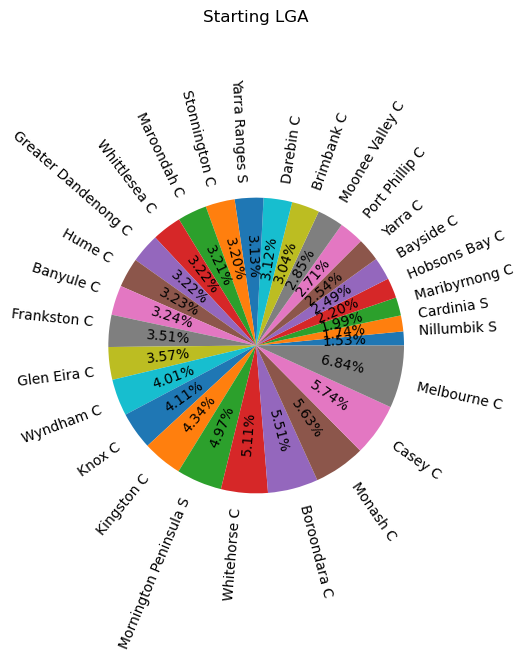

In [19]:
#Create pie chart for melbourne compared to others
labels = LGA_count['LGA'].unique()

sizes = LGA_count['Starting LGA count']


fig, ax = plt.subplots()
patches, labels, pct_texts = ax.pie(sizes,labels=labels,rotatelabels=True,autopct='%1.2f%%')
plt.title('Starting LGA',pad=100)

for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())

plt.savefig(f"Images/Vista/Vista_Start_LGA_Pie.png", bbox_inches='tight')
plt.show()

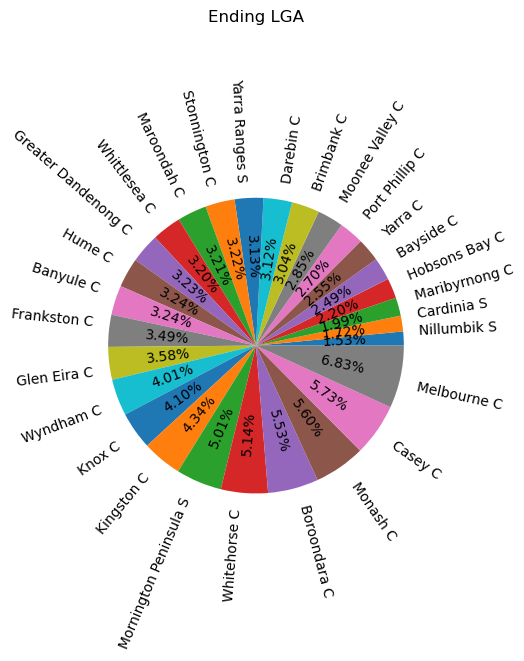

In [20]:
#Create pie chart for melbourne compared to others
labels = LGA_count['LGA'].unique()
sizes2= LGA_count['Ending LGA count']

fig, ax = plt.subplots()
patches, labels, pct_texts = ax.pie(sizes2,labels=labels,rotatelabels=True,autopct='%1.2f%%')
plt.title('Ending LGA',pad=100)

for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())
    
plt.savefig(f"Images/Vista/Vista_End_LGA_Pie.png",bbox_inches='tight')
plt.show()

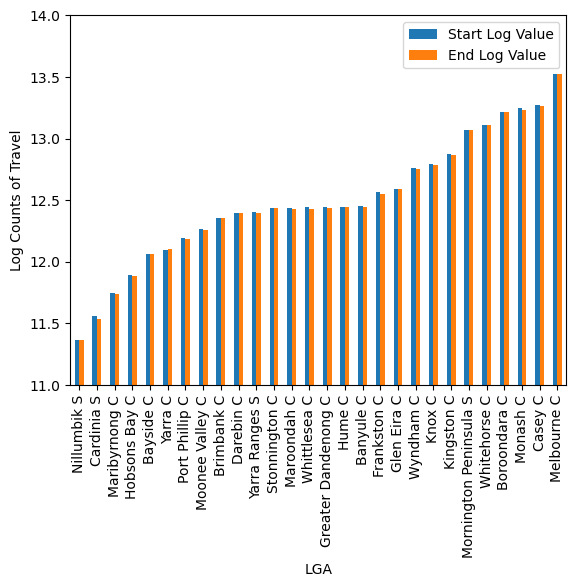

In [21]:
#Plotting log count of travel for each LGA 
LGA_count.plot(kind='bar',x = 'LGA',y=['Start Log Value','End Log Value'],ylabel='Log Counts of Travel')
plt.ylim(11,14)
plt.show()

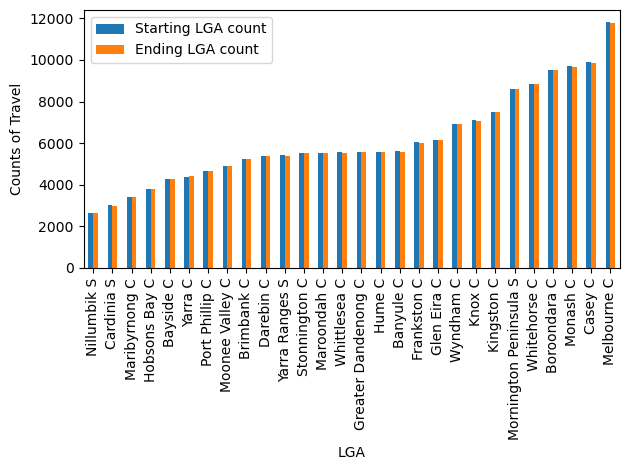

In [22]:
#Plotting counts of travel for each LGA
LGA_count.plot(kind='bar',x = 'LGA',y=['Starting LGA count','Ending LGA count'],ylabel= 'Counts of Travel')
plt.tight_layout()
plt.savefig(f"Images/Vista/Vista_LGA_Bargraph.png")
plt.show()

## Grouping by purpose of travel

In [23]:
#Grouping by trip purpose
purpose_travel = Vista.groupby(by = 'Trip_Purpose').count()

In [24]:
#Resetting index and retrieveing only columns trip purpose and trip id
purpose_travel_df = purpose_travel.reset_index(drop=False)[['Trip_Purpose','Trip_ID']]

In [25]:
#Sorting values
purpose_travel_df = purpose_travel_df.sort_values(by='Trip_ID')

In [26]:
purpose_travel_df.head()

,Trip_Purpose,Trip_ID
1,At or Go Home,28
5,Other Purpose,814
7,Pick-up or Deliver Something,3508
3,Change Mode,6026
0,Accompany Someone,9814


##

## Checking the usage of Bus, Train, Tram over 2018-2020

In [27]:
#Find the total counts Link_Mode for bus train and trams (The main mode of transport)
Mode_year_df = Vista.groupby(by=['Link_Mode','Year']).count().reset_index()

In [28]:
Mode_year_df

,Link_Mode,Year,Trip_ID,Person_ID,Total_Stops,Trip_Count,Start_Time,Arrival_Time,Trip_Time,Travel_Time,...,Mode_5,Mode_6,Mode_7,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7
0,Bicycle,2012,205,205,205,205,205,205,205,205,...,205,205,205,205,205,205,205,205,205,205
1,Bicycle,2013,368,368,368,368,368,368,368,368,...,368,368,368,368,368,368,368,368,368,368
2,Bicycle,2014,410,410,410,410,410,410,410,410,...,410,410,410,410,410,410,410,410,410,410
3,Bicycle,2015,424,424,424,424,424,424,424,424,...,424,424,424,424,424,424,424,424,424,424
4,Bicycle,2016,335,335,335,335,335,335,335,335,...,335,335,335,335,335,335,335,335,335,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Walking,2016,3525,3525,3525,3525,3525,3525,3525,3525,...,3525,3525,3525,3525,3525,3525,3525,3525,3525,3525
103,Walking,2017,2117,2117,2117,2117,2117,2117,2117,2117,...,2117,2117,2117,2117,2117,2117,2117,2117,2117,2117
104,Walking,2018,4376,4376,4376,4376,4376,4376,4376,4376,...,4376,4376,4376,4376,4376,4376,4376,4376,4376,4376
105,Walking,2019,3109,3109,3109,3109,3109,3109,3109,3109,...,3109,3109,3109,3109,3109,3109,3109,3109,3109,3109


In [29]:
#Taking only years 2018-2020
Mode_year_df = Mode_year_df.loc[((Mode_year_df['Year']==2018)|(Mode_year_df['Year']==2019)|(Mode_year_df['Year']==2020))]

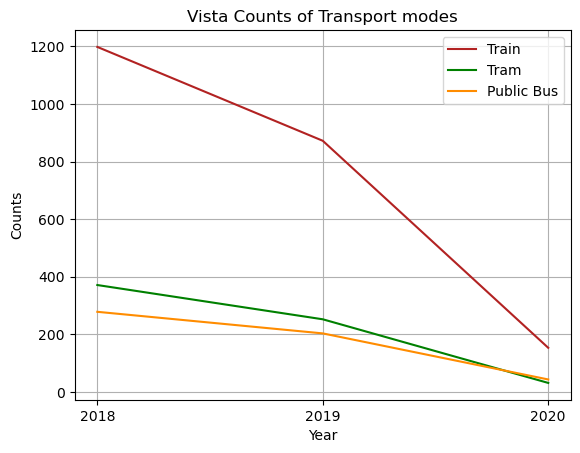

In [30]:
#Plot scatter of counts over time
plt.subplots()
plt.plot(Mode_year_df.loc[Mode_year_df['Link_Mode']=='Train']['Year'],Mode_year_df.loc[Mode_year_df['Link_Mode']=='Train']['Trip_ID'],label='Train',color='firebrick')
plt.plot(Mode_year_df.loc[Mode_year_df['Link_Mode']=='Tram']['Year'],Mode_year_df.loc[Mode_year_df['Link_Mode']=='Tram']['Trip_ID'],label='Tram',color='green')
plt.plot(Mode_year_df.loc[Mode_year_df['Link_Mode']=='Public Bus']['Year'],Mode_year_df.loc[Mode_year_df['Link_Mode']=='Public Bus']['Trip_ID'],label='Public Bus',color='darkorange')

#Figure properties
plt.xticks((2018,2019,2020))
plt.title('Vista Counts of Transport modes')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.grid()
plt.legend()

plt.savefig(f"Images/Vista/Vista_Transport_Passenger_LineGraph.png",bbox_inches='tight')
plt.show()

In [31]:
#Grouping by link mode 
Mode_df = Vista.groupby(by='Link_Mode').count().reset_index()

In [32]:
#Retrieving only rows that either contain train tram or pulbic bus
Mode_df = Mode_df.loc[(Mode_df['Link_Mode']=='Train')|(Mode_df['Link_Mode']=='Tram')|(Mode_df['Link_Mode']=='Public Bus')]
Mode_df

,Link_Mode,Trip_ID,Person_ID,Year,Total_Stops,Trip_Count,Start_Time,Arrival_Time,Trip_Time,Travel_Time,...,Mode_5,Mode_6,Mode_7,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7
5,Public Bus,1759,1759,1759,1759,1759,1759,1759,1759,1759,...,1759,1759,1759,1759,1759,1759,1759,1759,1759,1759
8,Train,7916,7916,7916,7916,7916,7916,7916,7916,7916,...,7916,7916,7916,7916,7916,7916,7916,7916,7916,7916
9,Tram,2120,2120,2120,2120,2120,2120,2120,2120,2120,...,2120,2120,2120,2120,2120,2120,2120,2120,2120,2120


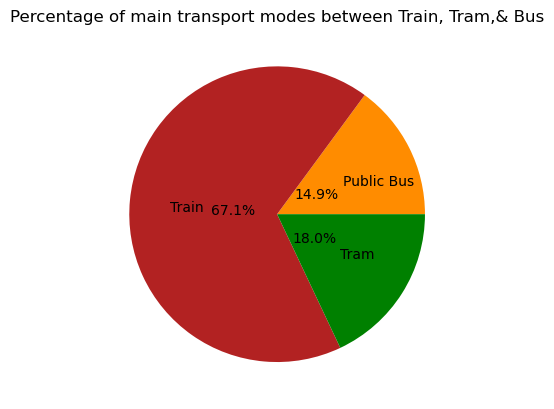

In [33]:
#Plot Pie Graph of main modes of transport stated by individuals
labels = Mode_df['Link_Mode'].unique()
sizes = Mode_df['Trip_ID']
colors = ['darkorange','firebrick','green']

fig, ax = plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,rotatelabels=False,autopct='%1.1f%%',
      labeldistance =.5,pctdistance=.3)
plt.title('Percentage of main transport modes between Train, Tram,& Bus')
plt.show()

In [34]:
#Get the counts of Public Bus, Train, Tram in Mode 1 - 10
Bus_counter = 0
Train_counter = 0
Tram_counter = 0

counts_df = Vista[['Mode_1','Mode_2','Mode_3','Mode_4','Mode_5','Mode_6','Mode_7',]]

In [35]:
#Saving counts for each mode into their list
for column in counts_df:
        Bus_counter = Bus_counter + counts_df[column].value_counts()['Public Bus']
        Train_counter = Train_counter + counts_df[column].value_counts()['Train']
        Tram_counter = Tram_counter + counts_df[column].value_counts()['Tram']

In [36]:
#Turn counts into a dataframe to plot
labels = ['Bus','Train','Tram']
counts = [Bus_counter,Train_counter,Tram_counter]
data = {'Mode of Transport':labels,'Counts of Transport':counts}
Mode_counts = pd.DataFrame(data=data)

In [37]:
Mode_counts

,Mode of Transport,Counts of Transport
0,Bus,3357
1,Train,8820
2,Tram,3384


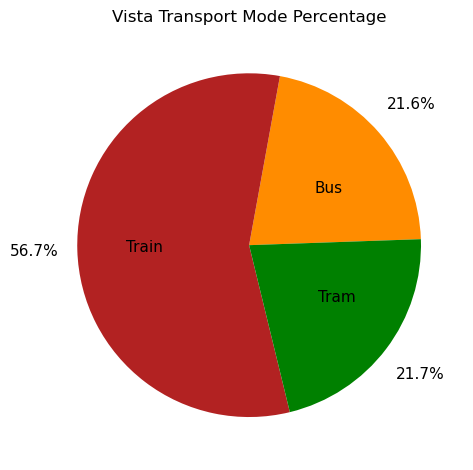

In [38]:
#Plot Pie Graph of Modes used.

sizes = Mode_counts['Counts of Transport']
fig, ax = plt.subplots()
colors = ['darkorange','firebrick','green']
ax.pie(sizes,labels=labels,colors=colors,rotatelabels=False,autopct='%1.1f%%',
      labeldistance =.5,pctdistance=1.25,startangle=2,textprops=dict(size=11))
plt.title('Vista Transport Mode Percentage')
plt.tight_layout()
plt.savefig(f"Images/Vista/Vista_Transport_Mode_Pie.png",bbox_inches='tight')
plt.show()

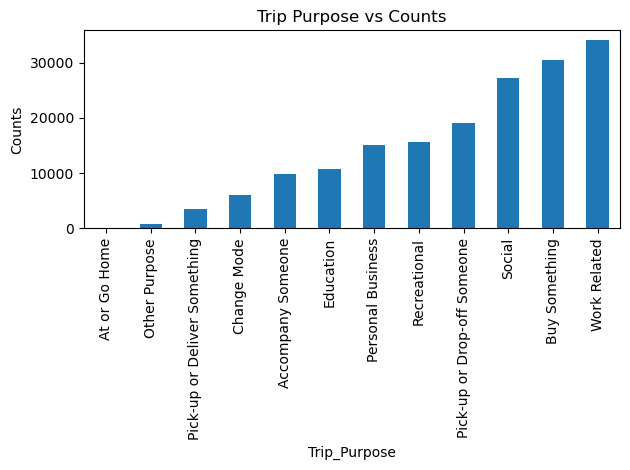

In [39]:
#Create bar graph on trip purpose 
Vista.groupby(by='Trip_Purpose').count().reset_index()[['Trip_Purpose','Trip_ID']].sort_values('Trip_ID').plot(kind='bar',x='Trip_Purpose',legend=False)
plt.ylabel('Counts')
plt.title('Trip Purpose vs Counts')
plt.tight_layout()
plt.savefig(f"Images/Vista/Vista_Trip_Purpose_Bargraph.png")
plt.show()

## Checking counts of trips purpose by city council area

In [40]:
#Grouping by Starting Starting LGA and Trip purpose 
lga_trip_purpose = Vista.groupby(by=['Starting_LGA','Trip_Purpose']).count().reset_index()[['Starting_LGA','Trip_Purpose','Trip_ID']]

#Sorting value based on trip ID count
lga_trip_purpose = lga_trip_purpose.sort_values('Trip_ID')

#Pivoting table
lga_trip_purpose = lga_trip_purpose.pivot(index='Trip_Purpose',columns='Starting_LGA').reset_index()

In [41]:
lga_trip_purpose

Trip_Purpose   Trip_ID                         \
Starting_LGA                               Banyule C Bayside C Boroondara C   
0                        Accompany Someone     322.0     298.0        532.0   
1                            At or Go Home       NaN       NaN          NaN   
2                            Buy Something     936.0     721.0       1527.0   
3                              Change Mode      92.0      61.0        227.0   
4                                Education     360.0     197.0        716.0   
5                            Other Purpose      25.0      22.0         57.0   
6                        Personal Business     535.0     453.0        917.0   
7             Pick-up or Deliver Something     115.0      95.0        203.0   
8              Pick-up or Drop-off Someone     672.0     432.0       1062.0   
9                             Recreational     622.0     502.0       1101.0   
10                                  Social     907.0     905.0       1598.0   
11                            Work Related    1014.0     605.0       1570.0   

                                                                              \
Starting_LGA Brimbank C Cardinia S Casey C Darebin C Frankston C Glen Eira C   
0                 309.0      241.0   640.0     320.0       407.0       374.0   
1                   3.0        1.0     1.0       NaN         NaN         1.0   
2                 924.0      630.0  1895.0    1049.0      1166.0      1013.0   
3                  75.0       23.0    74.0     136.0        68.0       104.0   
4                 410.0      194.0   820.0     362.0       329.0       474.0   
5                  10.0       14.0    27.0      37.0        35.0        32.0   
6                 484.0      311.0  1009.0     426.0       609.0       601.0   
7                  74.0       82.0   183.0      83.0       124.0       129.0   
8                 721.0      322.0  1315.0     537.0       675.0       682.0   
9                 359.0      240.0   785.0     447.0       629.0       637.0   
10                723.0      427.0  1359.0     920.0       927.0      1058.0   
11               1156.0      527.0  1803.0    1068.0      1084.0      1061.0   

              ...                                                     \
Starting_LGA  ... Moonee Valley C Mornington Peninsula S Nillumbik S   
0             ...           312.0                  433.0       179.0   
1             ...             1.0                    1.0         1.0   
2             ...           969.0                 1797.0       448.0   
3             ...            84.0                   86.0        22.0   
4             ...           347.0                  372.0       230.0   
5             ...            21.0                   75.0         7.0   
6             ...           408.0                 1100.0       301.0   
7             ...            86.0                  248.0        54.0   
8             ...           559.0                  822.0       310.0   
9             ...           478.0                 1006.0       256.0   
10            ...           784.0                 1409.0       386.0   
11            ...           876.0                 1233.0       441.0   

                                                                               \
Starting_LGA Port Phillip C Stonnington C Whitehorse C Whittlesea C Wyndham C   
0                     229.0         277.0        515.0        332.0     502.0   
1                       2.0           NaN          NaN          NaN       NaN   
2                     711.0        1057.0       1745.0       1016.0    1278.0   
3                     198.0         234.0        160.0         57.0      73.0   
4                     140.0         234.0        615.0        457.0     618.0   
5                      39.0          16.0         45.0         12.0      36.0   
6                     377.0         470.0        816.0        435.0     572.0   
7                      99.0         122.0        210.0        11

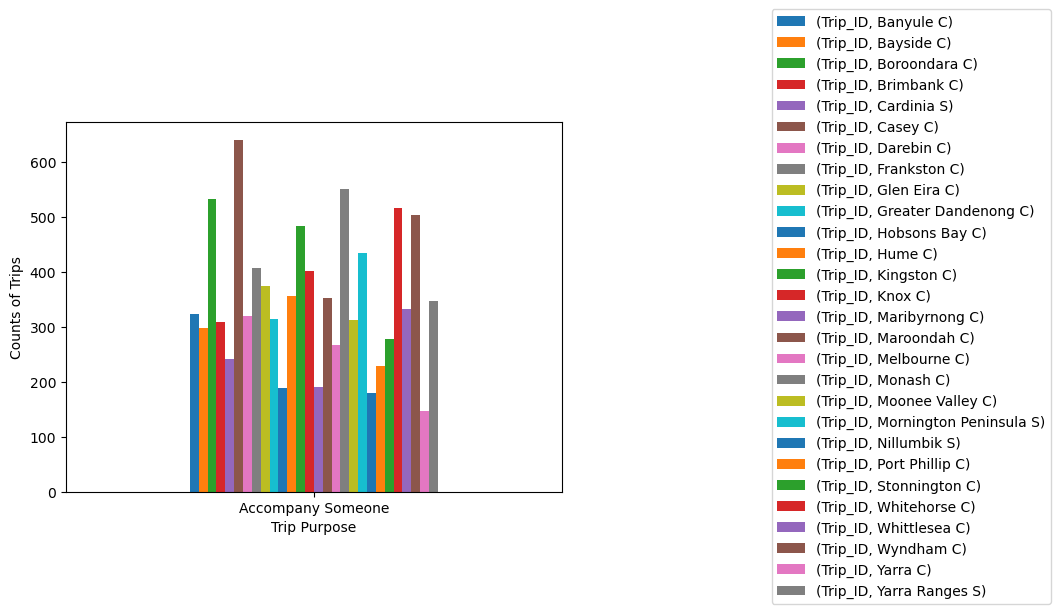

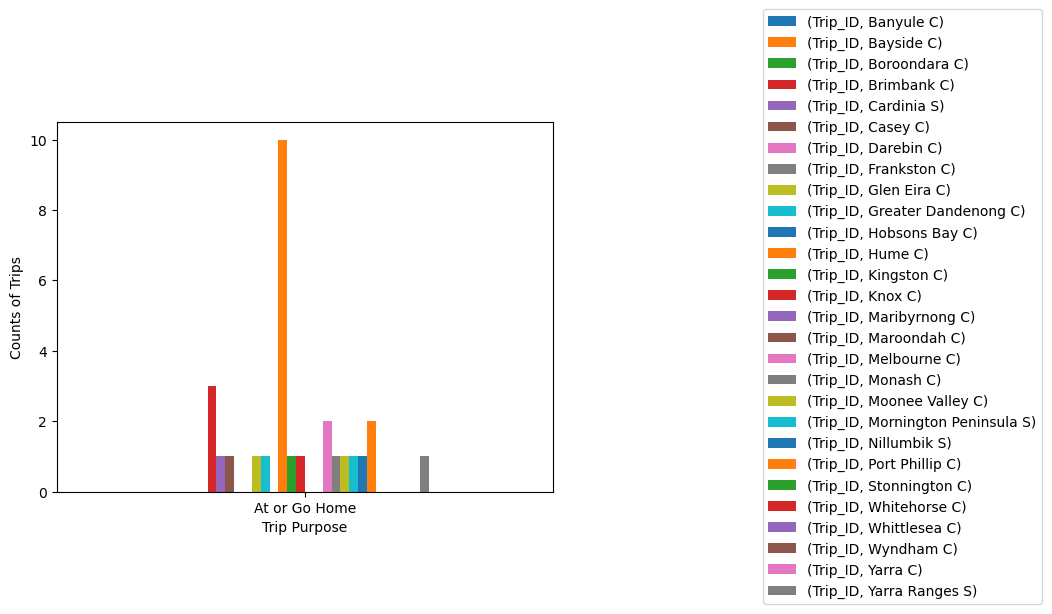

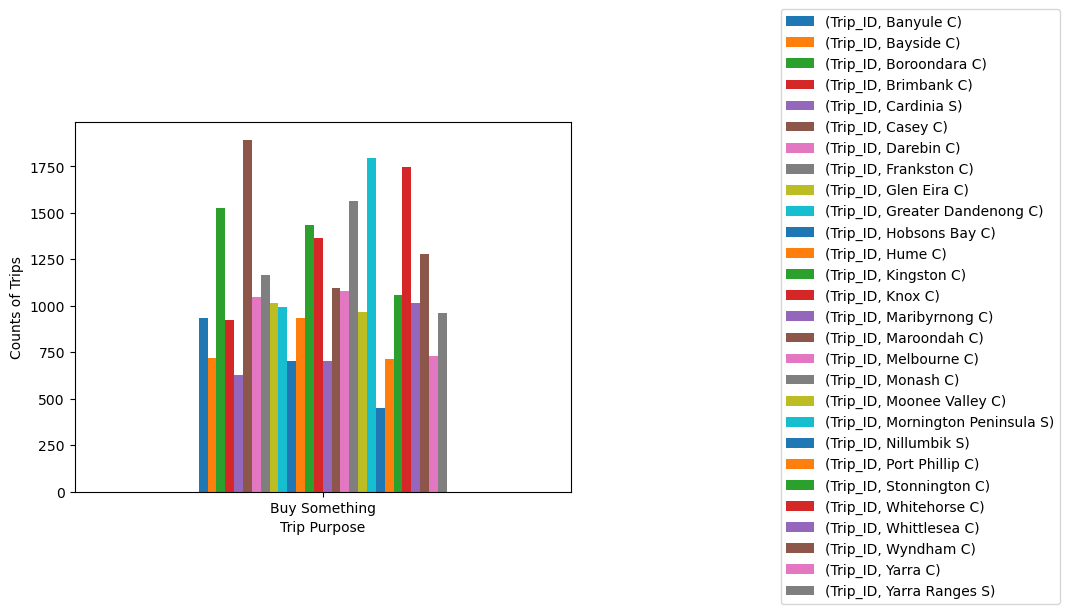

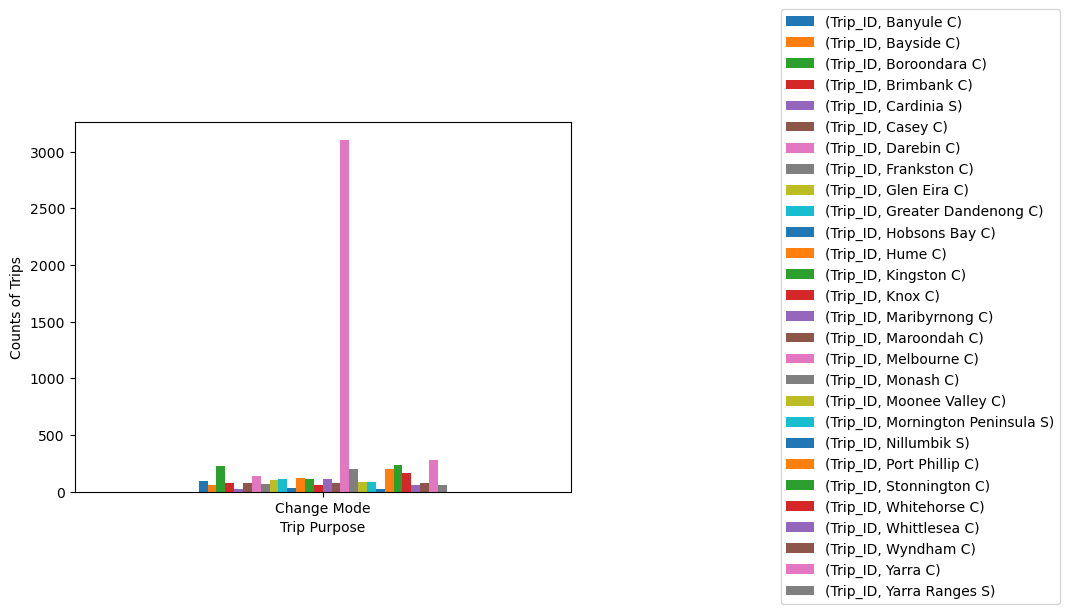

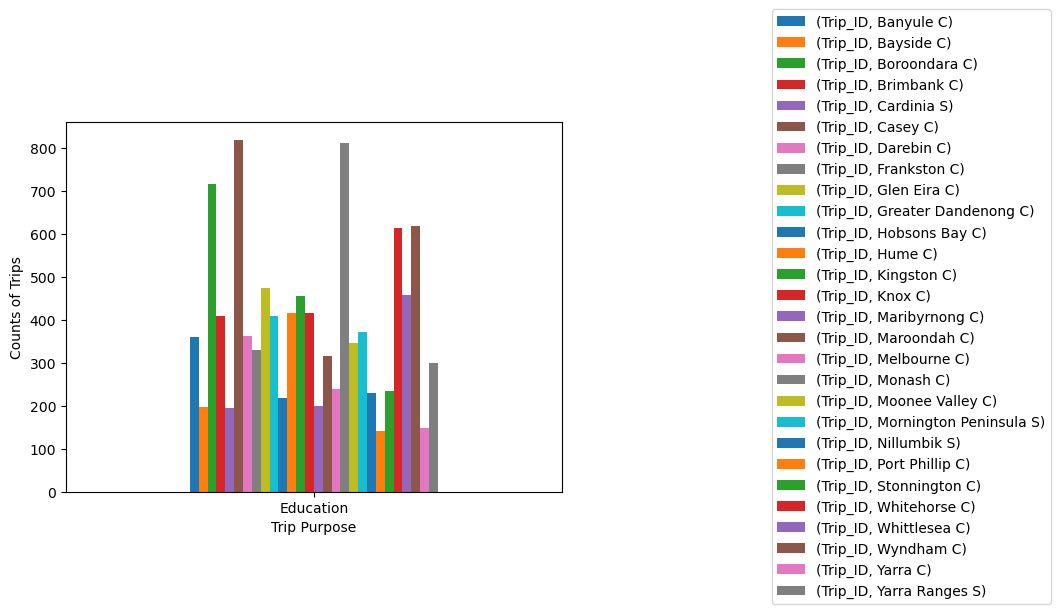

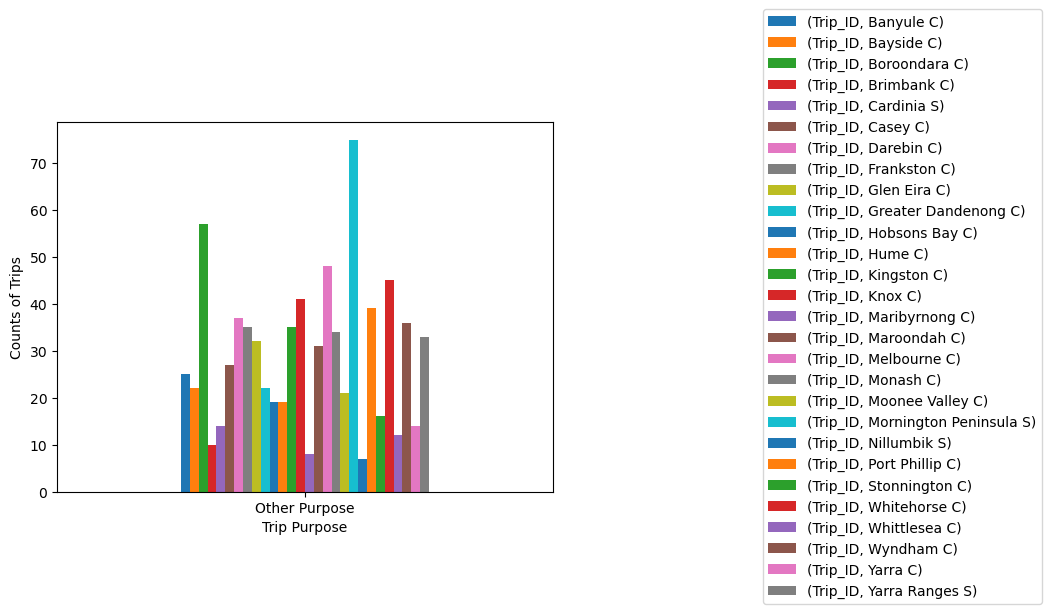

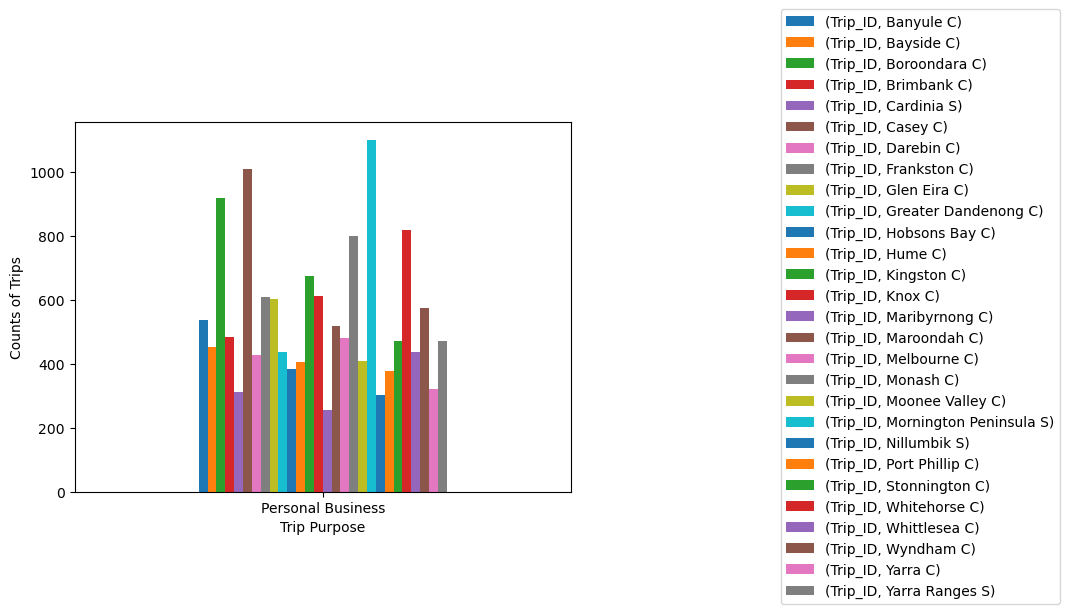

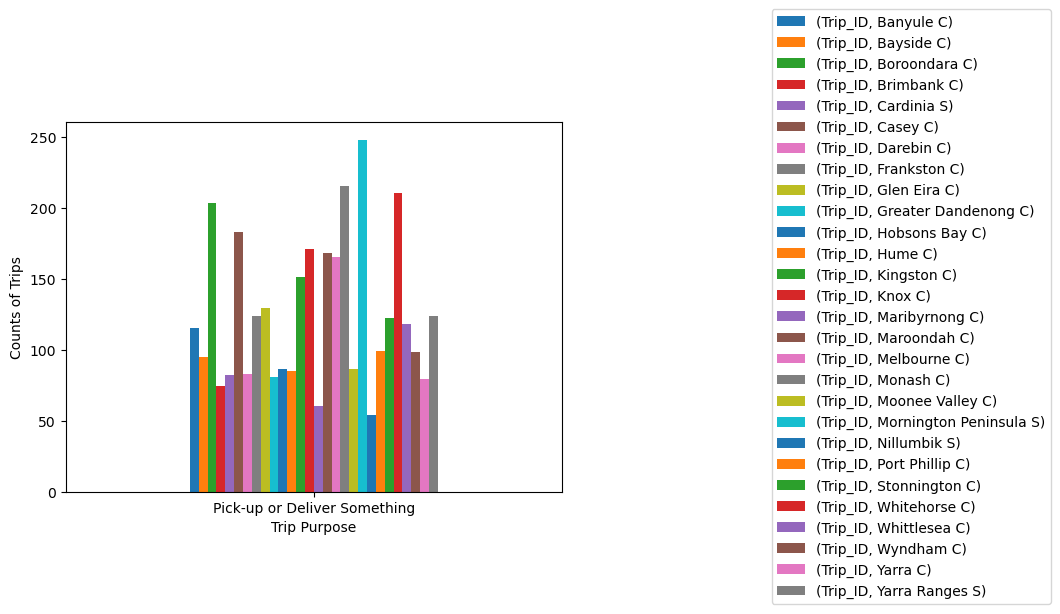

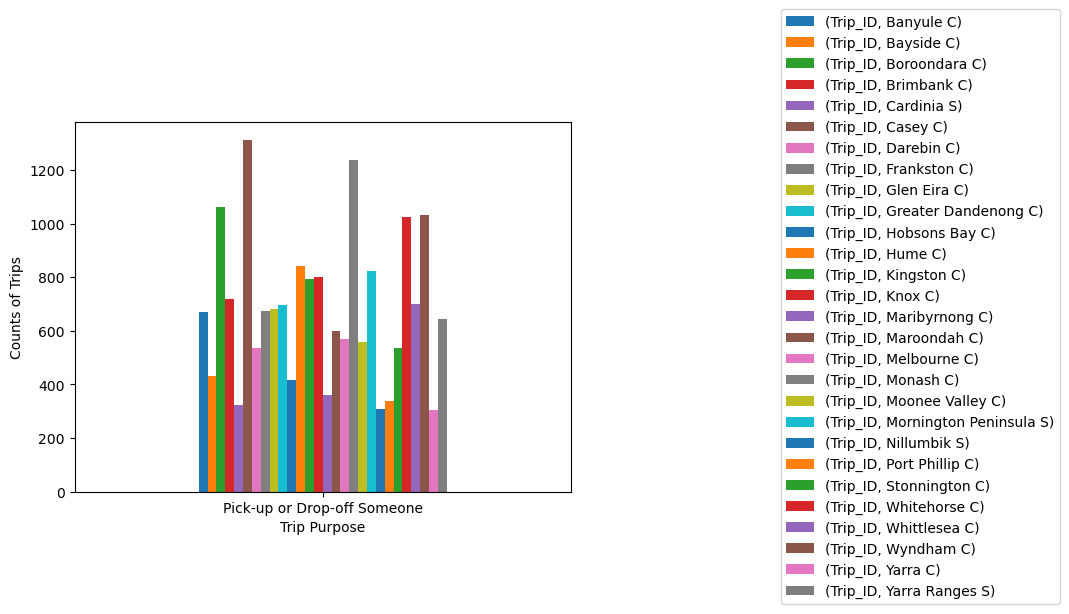

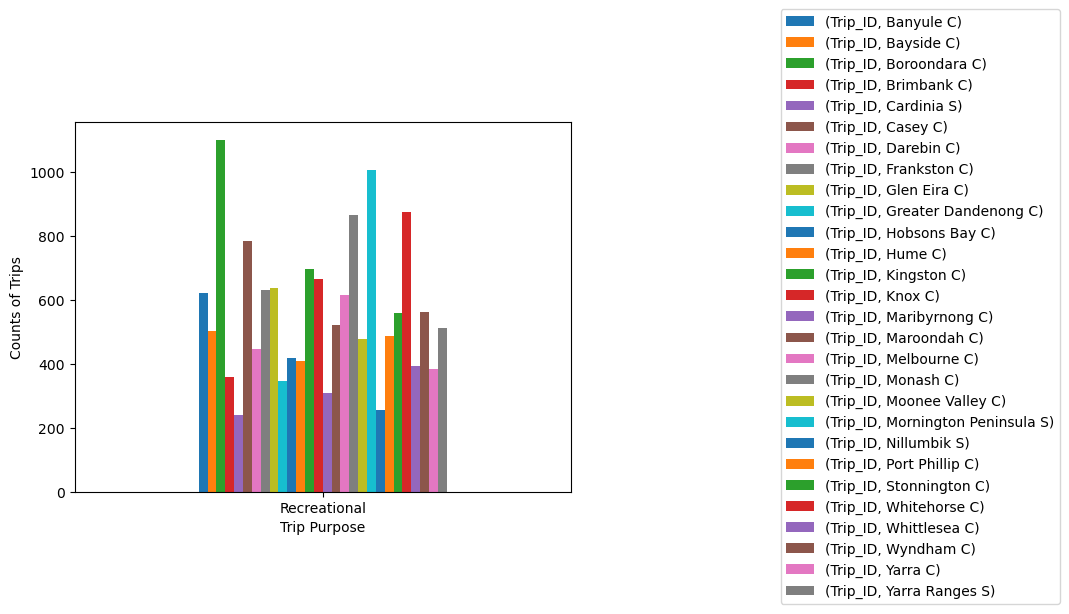

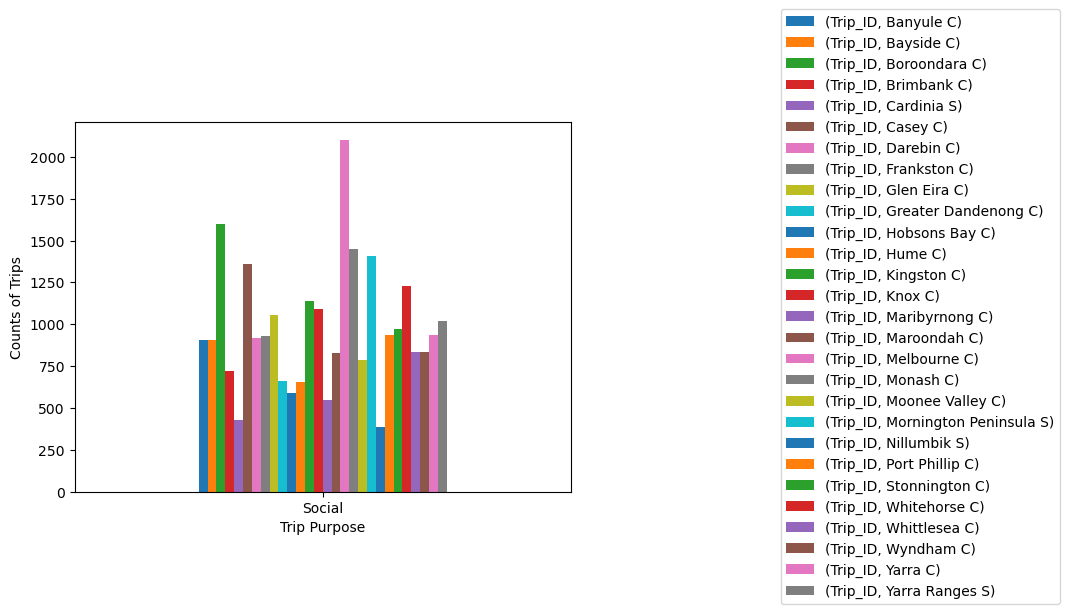

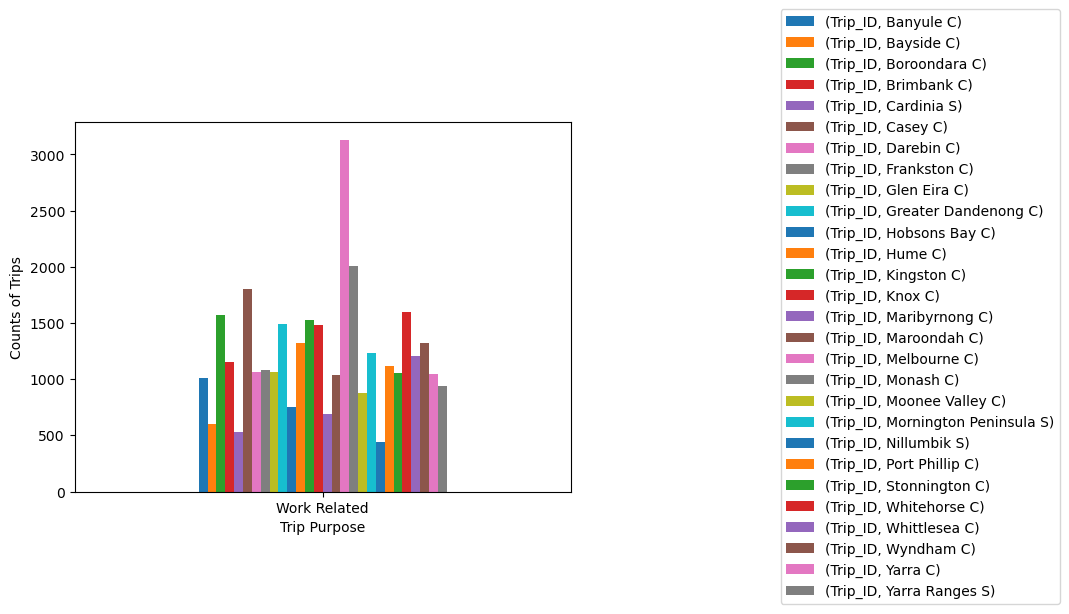

In [42]:
for purpose in lga_trip_purpose['Trip_Purpose'].unique():
    lga_trip_purpose.loc[lga_trip_purpose['Trip_Purpose']==purpose].sort_values(by='Trip_Purpose',axis=0).plot(kind='bar',x ='Trip_Purpose').legend(loc='right',bbox_to_anchor=(2, 0.5))
    plt.xlabel('Trip Purpose')
    plt.ylabel('Counts of Trips')
    plt.xticks(rotation=360)
    plt.savefig(f"Images/Vista/Vista_{purpose}_bar_.png",bbox_inches='tight')

In [43]:
#Retrieving merged_df from housing notebook
#Removing unwanted columns
Distance = merged_df[['City council','Distance']]
#Renaming column for merge
Distance = Distance.rename(columns = {'City council':'LGA'})

In [44]:
#Merge into LGA count
merge2 = pd.merge(LGA_count,Distance,on='LGA',how='inner')

In [45]:
merge2

,LGA,Starting LGA count,Ending LGA count,Start Log Value,End Log Value,Distance
0,Nillumbik S,2635,2635,11.363587,11.363587,25.629336
1,Cardinia S,3012,2967,11.556506,11.534789,48.815247
2,Maribyrnong C,3435,3419,11.746094,11.739359,7.113931
3,Hobsons Bay C,3800,3790,11.891784,11.887982,11.572842
4,Bayside C,4291,4282,12.067098,12.064069,14.183177
5,Yarra C,4382,4397,12.097374,12.102304,3.099026
6,Port Phillip C,4677,4646,12.191368,12.181773,5.919713
7,Moonee Valley C,4925,4910,12.265908,12.261507,6.925495
8,Brimbank C,5248,5236,12.357552,12.354249,16.208247
9,Darebin C,5385,5378,12.394731,12.392854,8.325017


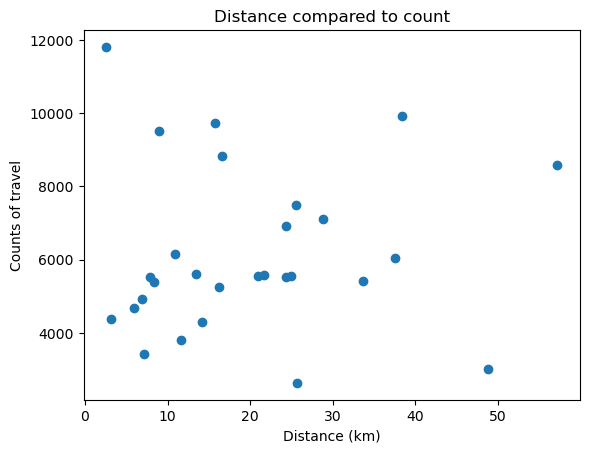

In [46]:
#Plotting scatter of distance vs count from each LGA
x_axis= merge2['Distance']
y_axis = merge2['Starting LGA count']
plt.scatter(x=x_axis,y=y_axis)
plt.title('Distance compared to count')
plt.xlabel('Distance (km)')
plt.ylabel('Counts of travel')
plt.show()